문제 주제
고객 매출 데이터 분석 및 시각화 시스템 개발
문제 내용
고객의 구매 데이터를 분석하는 시스템을 개발합니다.
고객의 구매 기록을 바탕으로 월별 매출 총합과 고객별 누적 매출 비율을 시각화하는 프로그램을 만드세요.
이 시스템은 캡슐화를 적용하여 CustomerSalesAnalysis 클래스를 만들어 개발합니다.

데이터 초기화

- 아래의 고객 매출 데이터를 기반으로 프로그램을 개발합니다.
- 데이터에는 고객명, 구매일자, 상품명, 수량, 단가가 포함됩니다.

분석 요구사항

- 월별 매출 총합을 계산하여 막대 그래프로 시각화 합니다.
- 고객별 누적 매출을 파이 차트로 시각화 합니다.

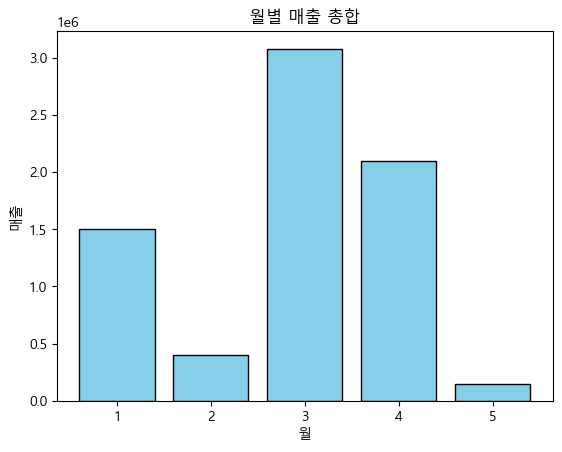

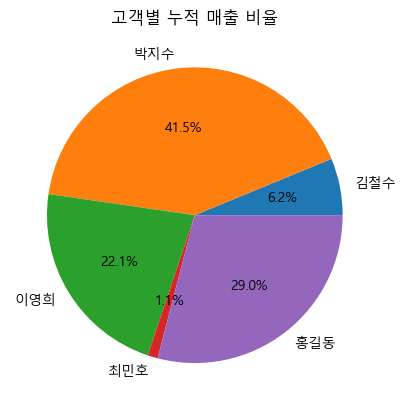

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class CustomerSalesAnalysis:
    def __init__(self, data):
        self.df = pd.DataFrame(data)

        # 초기 구매일자의 데이터 타입은 문자열이므로 datetime으로의 변환이 필요하다.
        self.df['구매일자'] =pd.to_datetime(self.df['구매일자'])
        self.df['월'] = self.df['구매일자'].dt.month

        self.df['매출'] = self.df['수량'] * self.df['단가']

    def monthly_bchart(self):
        monthly = self.df.groupby('월')['매출'].sum()
        plt.rc('font', family='Malgun Gothic')
        plt.bar(monthly.index, monthly.values, color='skyblue', edgecolor='black')

        # 그래프 설정
        plt.title('월별 매출 총합')
        plt.xlabel('월')
        plt.ylabel('매출')

        #그래프 출력
        plt.show()

    def customer_piechart(self):
        # 고객별 누적 매출 비율, 이름에 따른 구매비율매비율
        data = self.df.groupby('고객명')['매출'].sum()
        plt.title('고객별 누적 매출 비율')
        plt.pie(data.values, labels=data.index, autopct=f'%.1f%%')
        plt. show ()


if __name__ == '__main__':
    # 데이터 초기화
    data = {
        '고객명': ['홍길동', '이영희', '김철수', '박지수', '최민호', '홍길동', '이영희', '김철수'],
        '구매일자': ['2024-01-10', '2024-02-14', '2024-02-18', '2024-03-05', '2024-03-20', '2024-04-10', '2024-04-25', '2024-05-05'],
        '상품명': ['노트북', '키보드', '모니터', '노트북', '마우스', '모니터', '노트북', '키보드'],
        '수량': [1, 2, 1, 2, 4, 2, 1, 3],
        '단가': [1500000, 50000, 300000, 1500000, 20000, 300000, 1500000, 50000]
    }
    chart_class = CustomerSalesAnalysis(data)
    chart_class.monthly_bchart()
    chart_class.customer_piechart()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 초기화
data = {
    '고객명': ['홍길동', '이영희', '김철수', '박지수', '최민호', '홍길동', '이영희', '김철수'],
    '구매일자': ['2024-01-10', '2024-02-14', '2024-02-18', '2024-03-05', '2024-03-20', '2024-04-10', '2024-04-25', '2024-05-05'],
    '상품명': ['노트북', '키보드', '모니터', '노트북', '마우스', '모니터', '노트북', '키보드'],
    '수량': [1, 2, 1, 2, 4, 2, 1, 3],
    '단가': [1500000, 50000, 300000, 1500000, 20000, 300000, 1500000, 50000]
}

df = pd.DataFrame(data)

In [3]:
for i in range(8):
    print(df['구매일자'][i], type(df['구매일자'][i]))

2024-01-10 <class 'str'>
2024-02-14 <class 'str'>
2024-02-18 <class 'str'>
2024-03-05 <class 'str'>
2024-03-20 <class 'str'>
2024-04-10 <class 'str'>
2024-04-25 <class 'str'>
2024-05-05 <class 'str'>


In [4]:
# 초기 구매일자의 데이터 타입은 문자열이므로 datetime으로의 변환이 필요하다.
df['구매일자'] =pd.to_datetime(df['구매일자'])
df['month'] = df['구매일자'].dt.month
df


,고객명,구매일자,상품명,수량,단가,month
0,홍길동,2024-01-10,노트북,1,1500000,1
1,이영희,2024-02-14,키보드,2,50000,2
2,김철수,2024-02-18,모니터,1,300000,2
3,박지수,2024-03-05,노트북,2,1500000,3
4,최민호,2024-03-20,마우스,4,20000,3
5,홍길동,2024-04-10,모니터,2,300000,4
6,이영희,2024-04-25,노트북,1,1500000,4
7,김철수,2024-05-05,키보드,3,50000,5


In [29]:
print('총 매출액 : ', df.groupby('구매일자')[['수량', '단가']].sum())
df['총 매출액'] = df.groupby('구매일자')[['수량', '단가']].transform('sum')
df

총 매출액 :              수량       단가
구매일자                   
2024-01-10   1  1500000
2024-02-14   2    50000
2024-02-18   1   300000
2024-03-05   2  1500000
2024-03-20   4    20000
2024-04-10   2   300000
2024-04-25   1  1500000
2024-05-05   3    50000


TypeError: GroupBy.sum() got an unexpected keyword argument 'axis'

In [39]:
df['매출'] = df['수량'] * df['단가']
print(df)
monthly = df.groupby('month')['매출'].sum()
print(monthly.values)

   고객명       구매일자  상품명  수량       단가  month       매출
0  홍길동 2024-01-10  노트북   1  1500000      1  1500000
1  이영희 2024-02-14  키보드   2    50000      2   100000
2  김철수 2024-02-18  모니터   1   300000      2   300000
3  박지수 2024-03-05  노트북   2  1500000      3  3000000
4  최민호 2024-03-20  마우스   4    20000      3    80000
5  홍길동 2024-04-10  모니터   2   300000      4   600000
6  이영희 2024-04-25  노트북   1  1500000      4  1500000
7  김철수 2024-05-05  키보드   3    50000      5   150000
[1500000  400000 3080000 2100000  150000]


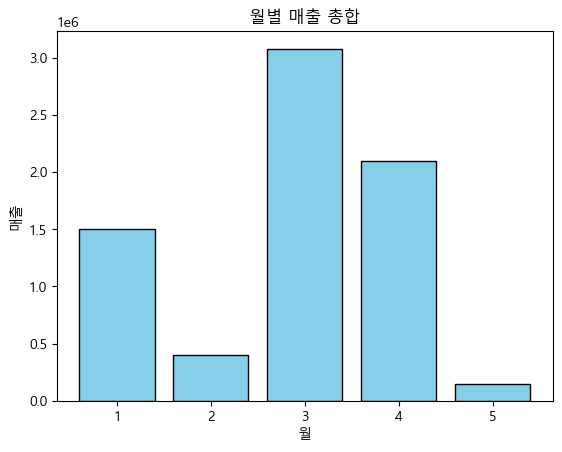

In [47]:
plt.rc('font', family='Malgun Gothic')
plt.bar(monthly.index, monthly.values, color='skyblue', edgecolor='black')

# 그래프 설정
plt.title('월별 매출 총합')
plt.xlabel('월')
plt.ylabel('매출')

#그래프 출력
plt.show()

In [49]:
# 고객별 누적 매출 비율, 이름에 따른 구매비율매비율
data = df.groupby('고객명')['매출'].sum()
print(data)

고객명
김철수     450000
박지수    3000000
이영희    1600000
최민호      80000
홍길동    2100000
Name: 매출, dtype: int64


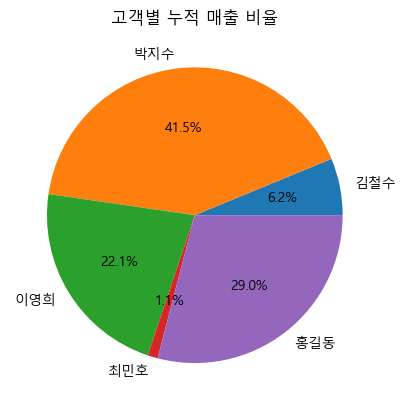

In [58]:
plt.title('고객별 누적 매출 비율')
plt.pie(data.values, labels=data.index, autopct=f'%.1f%%')
plt. show ()